In [31]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
print(tf.__version__)

2.7.0


## 파일 불러오기

In [32]:
train_path = "./drive/MyDrive/Colab Notebooks/shopee/train/"
test_path = "./drive/MyDrive/Colab Notebooks/shopee/test/"
# categories = ['acc','bag','electronic']

In [33]:
train_acc_list = glob(train_path+"/acc/*")
train_bag_list = glob(train_path+"/bag/*")
train_elec_list = glob(train_path+"/electronic/*")

In [12]:
train_acc_list[0]

'./drive/MyDrive/Colab Notebooks/shopee/train//acc/c_78.jpg'

In [13]:
from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave

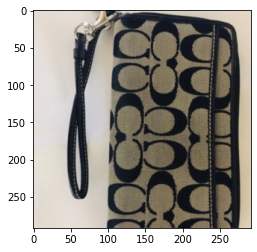

In [14]:
image = imread(train_acc_list[100])
plt.imshow(image)

In [15]:
train_acc_list[0].split('/')[-1][:-4]

'c_78'

## resize

In [16]:
def img_resize(img):
  return resize(img, (292,292))

## train / test split

In [63]:
# train_acc
from tqdm.notebook import tqdm

def convert_train_acc():
  train_acc_list = glob(train_path+"/acc/*")
  for each in tqdm(train_acc_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/train_raw/acc/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_train_acc()

  0%|          | 0/229 [00:00<?, ?it/s]

In [64]:
# train_bag
from tqdm.notebook import tqdm

def convert_train_bag():
  train_bag_list = glob(train_path+"/bag/*")
  for each in tqdm(train_bag_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/train_raw/bag/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_train_bag()

  0%|          | 0/229 [00:00<?, ?it/s]

In [28]:
# train_electronic
from tqdm.notebook import tqdm

def convert_train_elec():
  train_elec_list = glob(train_path+"/electronic/*")
  for each in tqdm(train_elec_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/train_raw/electronic/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_train_elec()

  0%|          | 0/474 [00:00<?, ?it/s]

OSError: ignored

In [37]:
# test_acc
from tqdm.notebook import tqdm

def convert_test_acc():
  test_acc_list = glob(test_path+"/acc/*")
  for each in tqdm(test_acc_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/test_raw/acc/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_acc()

  0%|          | 0/87 [00:00<?, ?it/s]

In [38]:
# test_bag
from tqdm.notebook import tqdm

def convert_test_bag():
  test_bag_list = glob(test_path+"/bag/*")
  for each in tqdm(test_bag_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/test_raw/bag/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_bag()

  0%|          | 0/107 [00:00<?, ?it/s]

In [39]:
# test_electronic
from tqdm.notebook import tqdm

def convert_test_elec():
  test_elec_list = glob(test_path+"/electronic/*")
  for each in tqdm(test_elec_list):
    img = imread(each)
    img_resized = img_resize(img)
    save_name = "./drive/MyDrive/Colab Notebooks/shopee/test_raw/electronic/" + each.split('/')[-1][:-4] + '.jpg'
    imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_elec()

  0%|          | 0/30 [00:00<?, ?it/s]

## image_generator

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (292,292),
    batch_size=3,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (292,292),
    batch_size=3,
    class_mode='categorical')

Found 908 images belonging to 3 classes.
Found 224 images belonging to 3 classes.


## 모델생성

In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3)
                , activation = 'relu'
                , input_shape = (292, 292, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 290, 290, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 288, 288, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 144, 144, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1327104)           0         
                                                                 
 dense (Dense)               (None, 128)               169869440 
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

## 모델 컴파일

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

## 모델 fit

In [44]:
hist = model.fit_generator(
        train_generator
        , steps_per_epoch = 5
        , epochs = 10
        , validation_data = test_generator
        , validation_steps = 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
5/5 [==============================] - 23s 4s/step - loss: 53.1119 - accuracy: 0.5333 - val_loss: 50.7291 - val_accuracy: 0.5333
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 12.7254 - accuracy: 0.4000 - val_loss: 2.5917 - val_accuracy: 0.2667
Epoch 3/10
5/5 [==============================] - 21s 4s/step - loss: 1.9468 - accuracy: 0.5333 - val_loss: 0.8792 - val_accuracy: 0.5333
Epoch 4/10
5/5 [==============================] - 21s 4s/step - loss: 0.9986 - accuracy: 0.4000 - val_loss: 1.2995 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 21s 4s/step - loss: 1.0947 - accuracy: 0.5333 - val_loss: 1.2536 - val_accuracy: 0.2667
Epoch 6/10
5/5 [==============================] - 21s 4s/step - loss: 0.9808 - accuracy: 0.6000 - val_loss: 1.3577 - val_accuracy: 0.2000
Epoch 7/10
5/5 [==============================] - 21s 4s/step - loss: 0.9226 - accuracy: 0.4000 - val_loss: 1.0776 - val_accuracy: 0.1333
Epoch 8/10
5/5 [===============

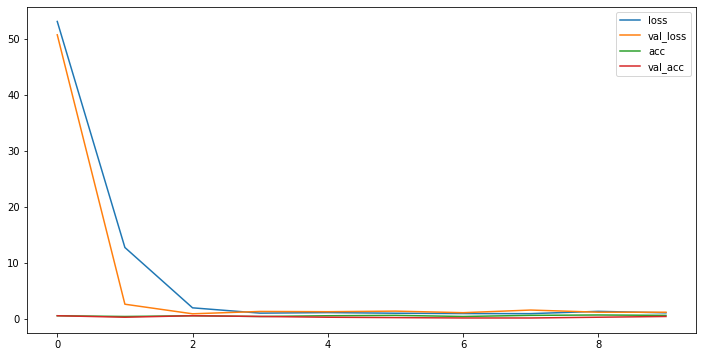

In [45]:
plt.figure(figsize = (12,6))
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

In [46]:
scores = model.evaluate(
    test_generator,
    steps=5)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1] * 100))

5/5 [==============================] - 2s 301ms/step - loss: 1.5140 - accuracy: 0.4000
accuracy: 40.00%


In [47]:
model.predict(test_generator)

array([[3.48996192e-01, 3.23540568e-01, 3.27463210e-01],
       [3.69399846e-01, 4.44296822e-02, 5.86170435e-01],
       [5.23480594e-01, 2.26563543e-01, 2.49955818e-01],
       [4.43902582e-01, 2.78470606e-01, 2.77626842e-01],
       [4.56242263e-01, 2.13729963e-01, 3.30027789e-01],
       [3.33536446e-01, 2.40737442e-02, 6.42389834e-01],
       [3.41328681e-01, 3.25889856e-01, 3.32781434e-01],
       [4.19039488e-01, 2.93375403e-01, 2.87585080e-01],
       [3.84359598e-01, 3.03027838e-01, 3.12612563e-01],
       [4.53825265e-01, 2.68821239e-01, 2.77353525e-01],
       [3.63925844e-01, 2.83020258e-01, 3.53053898e-01],
       [4.86864030e-01, 2.56413192e-01, 2.56722748e-01],
       [3.60896200e-01, 1.53461486e-01, 4.85642284e-01],
       [7.45147228e-01, 2.86694663e-03, 2.51985818e-01],
       [4.44215626e-01, 2.70424634e-01, 2.85359710e-01],
       [4.31572258e-01, 2.32428759e-01, 3.35998952e-01],
       [9.40423012e-01, 8.07344099e-04, 5.87695986e-02],
       [4.92617100e-01, 2.65496

In [48]:
n = 1

def show_prediction_result(n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(img, axis = 0))
    title = 'Predict :' + str(np.argmax(pred))
    plt.imshow(img/255)
    plt.title(title)
    plt.show()
    
show_prediction_result(n)

ValueError: ignored

In [ ]:
show_prediction_result(40)

## mnist 데이터로 학습완료해보기

In [130]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [131]:
x_train.shape

(60000, 28, 28)

In [132]:
x_train = x_train.reshape((60000, 28 * 28)) / 255.0
x_test = x_test.reshape((10000, 28 * 28)) / 255.0

In [133]:
x_train.shape

(60000, 784)

In [128]:
# Sequential model
model = tf.keras.models.Sequential()
# Stacking layers
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [111]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [113]:
model.fit(x_train, y_train, 
          epochs=5, 
          verbose=1, 
          validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7096 - accuracy: 0.8240 - val_loss: 0.3761 - val_accuracy: 0.8984
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3624 - accuracy: 0.8998 - val_loss: 0.3127 - val_accuracy: 0.9119
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3113 - accuracy: 0.9120 - val_loss: 0.2811 - val_accuracy: 0.9195
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.9200 - val_loss: 0.2553 - val_accuracy: 0.9268
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9266 - val_loss: 0.2419 - val_accuracy: 0.9304


In [116]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.9321


[0.24240192770957947, 0.9320999979972839]

In [117]:
preds = model.predict(x_test, batch_size=128)
preds[0]

array([9.2587339e-05, 4.4753267e-07, 5.8181671e-04, 4.6274229e-03,
       3.9149786e-06, 1.1525307e-04, 1.3262492e-07, 9.9335796e-01,
       3.8984421e-05, 1.1814960e-03], dtype=float32)

In [119]:
np.argmax(preds[0])

7

In [120]:
y_test[0]

7